# Imports and Data Preparation

In [1]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
diabetes = pd.read_csv("diabetes.csv")
X = diabetes.drop("Outcome", axis=1)
y = diabetes["Outcome"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, random_state=42, test_size=0.2, shuffle=True)

# Training the Model with Default Hyperparamaters and Raw Data

In [4]:
gaussNB = GaussianNB()
gaussNB.fit(X_train, y_train)
gaussNB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [5]:
y_pred = gaussNB.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

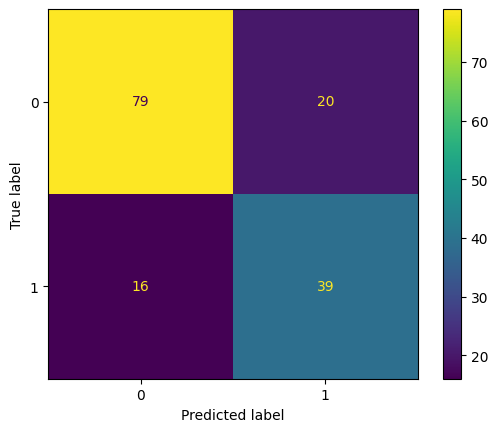

In [6]:
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx = ConfusionMatrixDisplay(confusion_matrix=conf_mx)
conf_mx.plot()

# Training the Model with Normalized Data [MinMaxScale()]

In [7]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
gaussNB.fit(X_train_scaled, y_train)

GaussianNB()

In [8]:
X_test_scaled = scaler.fit_transform(X_test)
y_pred_scaled = gaussNB.predict(X_test_scaled)
accuracy_score(y_test, y_pred_scaled)

0.6883116883116883

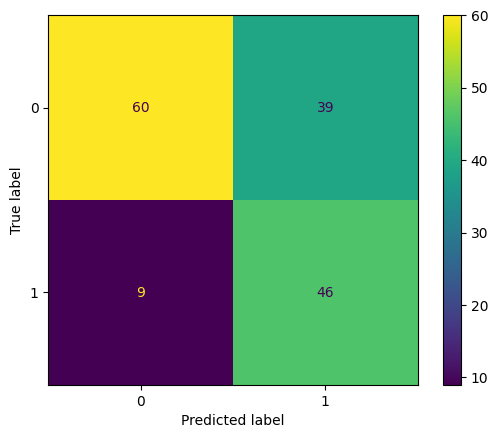

In [9]:
conf_mx_scaled = ConfusionMatrixDisplay(confusion_matrix = 
                       confusion_matrix(y_test, y_pred_scaled))
conf_mx_scaled.plot()

# Fine Tuning the Model (with normalized data) using GridSearchCV()

In [10]:
params = [
    {"var_smoothing": [9e-9, 3e-3, 7e-7, 5e-5]},
]

grid_search = GridSearchCV(gaussNB, params, cv=3, 
                          scoring="accuracy",
                          return_train_score=True)

In [11]:
grid_search.fit(X_train_scaled, y_train)
grid_search.best_params_

{'var_smoothing': 0.003}

In [12]:
grid_search.cv_results_["rank_test_score"]

array([2, 1, 2, 2])

In [13]:
best_estimator = grid_search.best_estimator_
y_pred_norm_tuned = best_estimator.predict(X_test_scaled)
accuracy_score(y_test, y_pred_norm_tuned)

0.6883116883116883

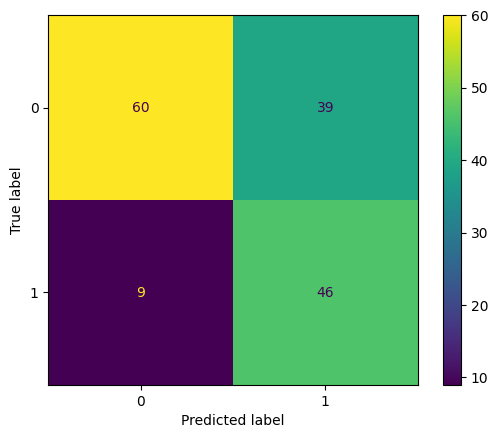

In [14]:
conf_mx_norm_tuned = ConfusionMatrixDisplay(confusion_matrix = 
                       confusion_matrix(y_test, y_pred_norm_tuned))
conf_mx_norm_tuned.plot()